<a href="https://colab.research.google.com/github/Check-Your-Skin/checkyourskin-ml_model/blob/dp-isic2020/Data%20Preparation/ISIC_SIIM_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


! unzip "/content/drive/My Drive/siim-isic2020.zip" -d "/content"

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from glob import glob
import io
from PIL import Image

In [ ]:
image_filepaths = glob(f"/content/siim-isic2020/siim-isic2020/tfrecords/*.tfrec")

image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
}

In [ ]:
def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

In [ ]:
raw_photo_image_dataset = tf.data.TFRecordDataset(image_filepaths)
photo_image_dataset = raw_photo_image_dataset.map(_parse_image_function)

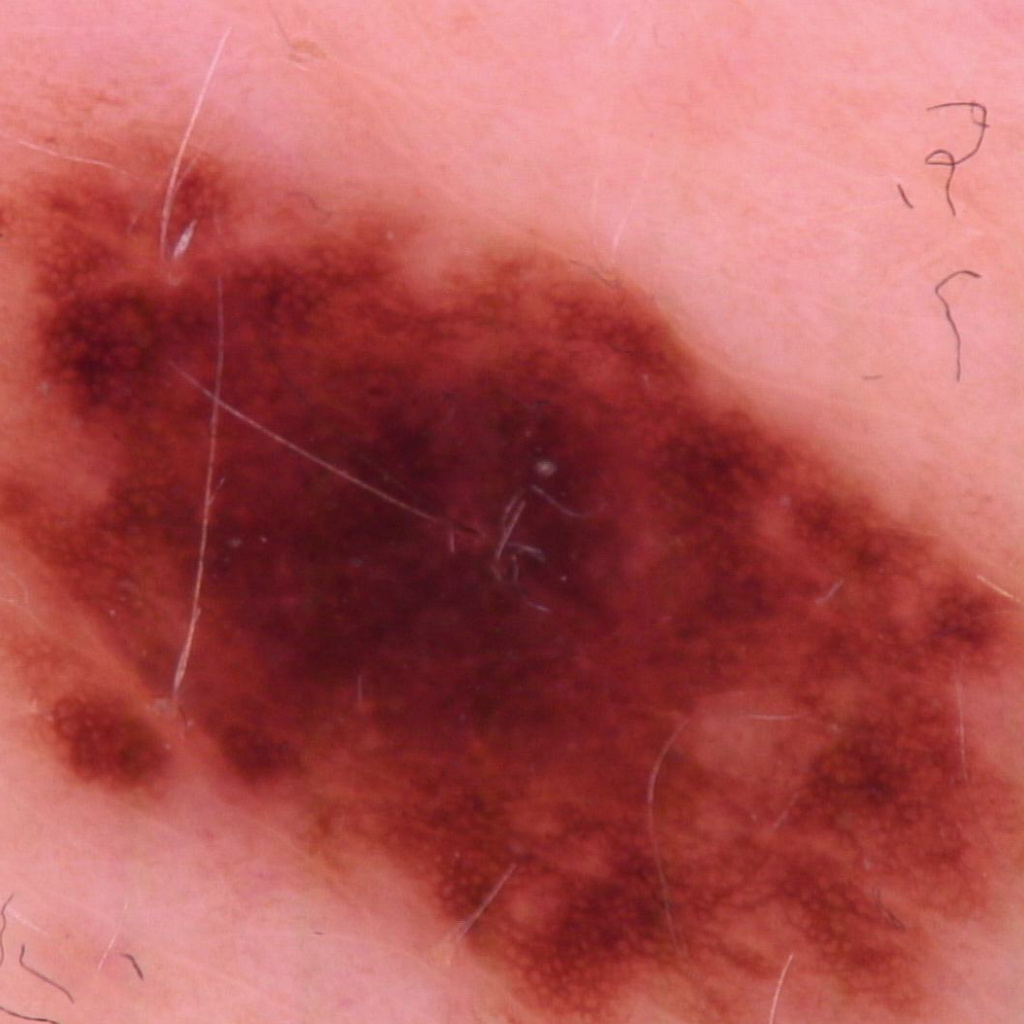

In [ ]:
for e in photo_image_dataset.take(1):
    image = Image.open(io.BytesIO(e['image'].numpy()))
image

In [ ]:
folder_paths_train = '/content/siim-isic2020/siim-isic2020/jpeg/test'

image_paths = glob(folder_paths_train + '/*.jpg')

images = []
sizes = []

for image_path in image_paths:
    try:
        img = Image.open(image_path)
        size = img.size
        sizes.append(size)

        images.append(img)

    except Exception as e:
        print(f"Fehlermeldung: {str(e)}")

print(len(images))

10982


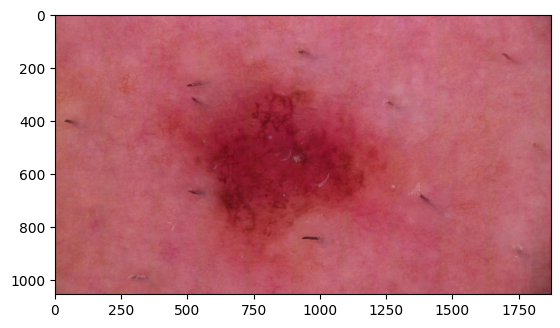

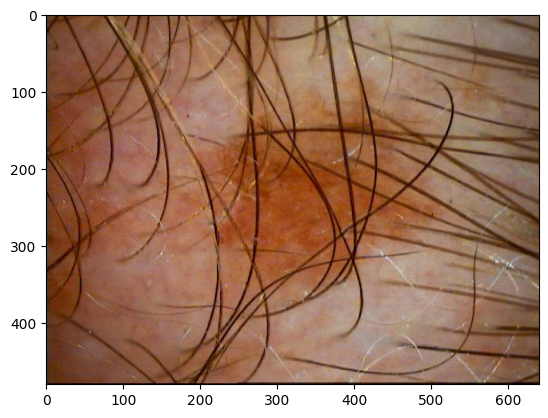

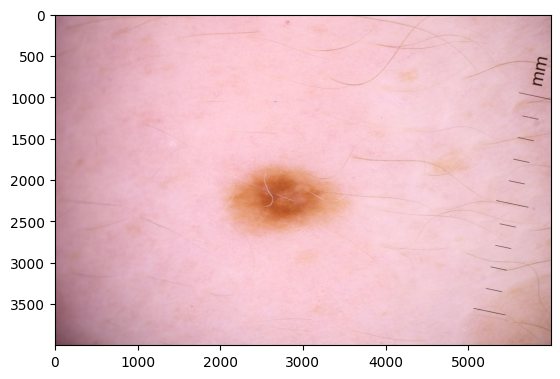

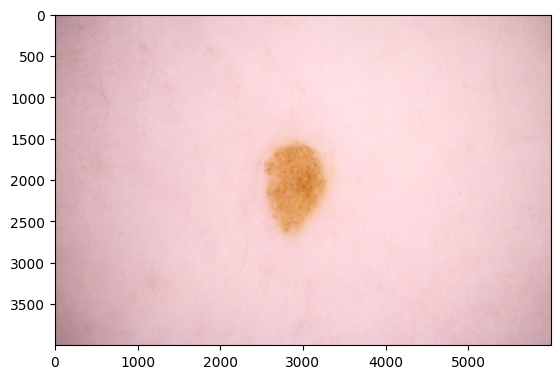

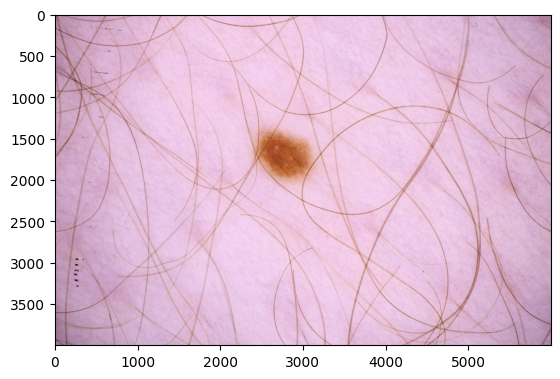

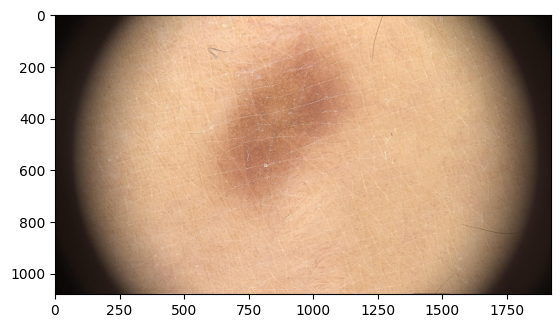

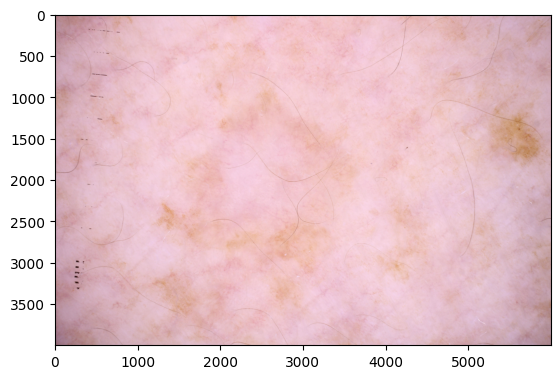

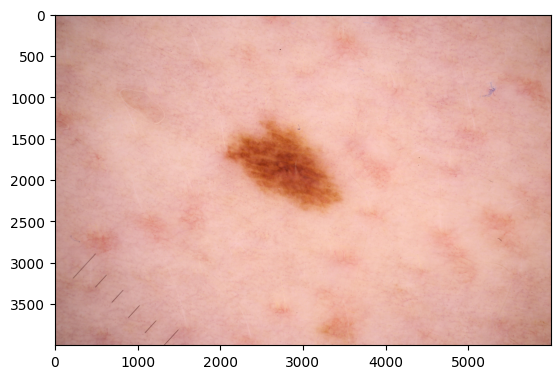

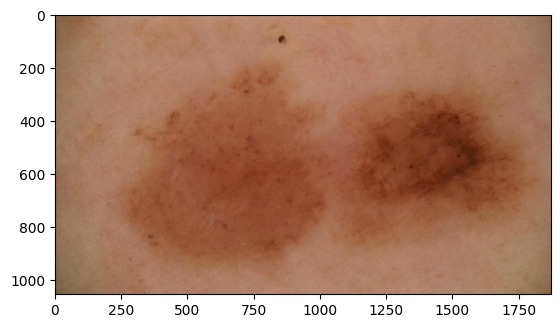

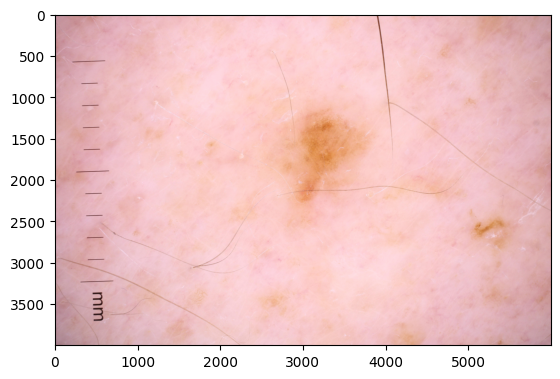

In [ ]:
for i, image in enumerate(images[:10]):
  plt.imshow(image)
  plt.show()